<h1>1. Introducción</h1>

<p>Según los úlimos estudios llevados a cabo por las grandes empresas del sector, a finales de 2018 se preveía que más de 3.000 millones de personas iban a ser usuarios de un <i>"Smartphone"</i>. De esos 3.000 millones, 2.200 millones utilizan el sistema operativo <b>Android</b>. Este SO admite el uso de aplicaciones llamadas <i>Apps</i> para dar al usuario una gran cantidad de versatilidad a la hora de utilizar su dispositivo.</p>

<p>Por ello se ha escogido el dataset llamado <b>Google Play Store Apps</b>, que consta de 13 variables que definen diferentes cuestiones de la aplicación.<p>

<h1>2. Variables</h1>

Las variables que se utilizarán en el estudio de las aplicaciones son las siguientes:

* App (String): Nombre de la aplicación.
* Category (String): Categoría de la aplicación.
* Rating (Decimal): Valoración global de la aplicación.
* Reviews (Integer): Número de reviews.
* Size (String): Tamaño de la aplicación.
* Installs (String): Número de veces que se ha instalado la aplicación.
* Type (String): Gratuita o de pago.
* Price (String): Precio de la aplicación en caso de que sea de pago.
* Content Rating (String): Público objetivo en base a la edad.
* Genres (String): Género de la aplicación, por ejemplo, Musical Family Game, puede tener los géneros 'música', 'juego', 'familiar'.
* Last Updated (Date): Fecha de la última actualización de la aplicación.
* Current Ver (String): Versión actual de la aplicación.
* Android Ver (String): Mínima versión requerida de Android para que funcione la aplicación.

<h1>3. Preparación del set de datos</h1>

<p>Antes de empezar a analizar los datos, es importante recogerlos de la misma forma que en el dataset original. Este apartado se dedicará exclusivamente a la preparación y limpieza de los datos del dataset.</p>

In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Carga del dataframe

df = pd.read_csv('datasets/googleplaystore.csv',
                 na_values = ['NaN'],
                 dtype = {'App':str, 
                          'Category':str, 
                          'Rating':'float16',
                          'Reviews':object,
                          'Size':str,
                          'Installs':str,
                          'Type':str,
                          'Price':str,
                          'Content Rating':str,
                          'Genres':str,
                          'Last Updated':object,
                          'Current Ver':str,
                          'Android Ver':str                      
                         })

#Para evitar problemas con los espacios en los nombres de las columnas, se renombran sin espacios.

df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'ContentRating', 'Genres', 'LastUpdated',
             'CurrentVer', 'AndroidVer']

# Debido a una fila corrupta, hay que cargar las columnas con el tipo 'object' ya que al intentar cargar las columnas en su 
# tipo original, da problemas de conversión.

print(df.dtypes)

#Limpieza del dataframe

# Por lo tanto, una vez localizada la fila corrupta, se elimina accediendo a través de su índice
# filtrando la línea a través de uno de los datos corruptos (categoría = 1.9).

df = df.drop(df[df.Category == '1.9'].index)

#Una vez eliminada la fila conflictiva, se toma la columna Reviews como integer.

df['Reviews'] = df['Reviews'].astype('int16')

df['LastUpdated'] = df['LastUpdated'].astype('datetime64')

print(df.dtypes)



App               object
Category          object
Rating           float16
Reviews           object
Size              object
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
LastUpdated       object
CurrentVer        object
AndroidVer        object
dtype: object
App                      object
Category                 object
Rating                  float16
Reviews                   int16
Size                     object
Installs                 object
Type                     object
Price                    object
ContentRating            object
Genres                   object
LastUpdated      datetime64[ns]
CurrentVer               object
AndroidVer               object
dtype: object


<h1>4. Datos de interés sobre el dataset</h1>

<p>Durante esta sección del notebook, se mostrarán de forma gráfica los datos de interés del dataset. Antes del código y la muestra de las gráficas, se explicará en qué consiste el análisis y por qué puede tener interés</p>

<h2>4.1 Categoría</h2>
    
<p>Al disponer de más de 10.000 datos, se puede determinar con cierto rigor la cantidad de aplicaciones que hay de cada categoría en el market. En el siguiente gráfico, se muestra el porcentaje de cada categoría.</p>

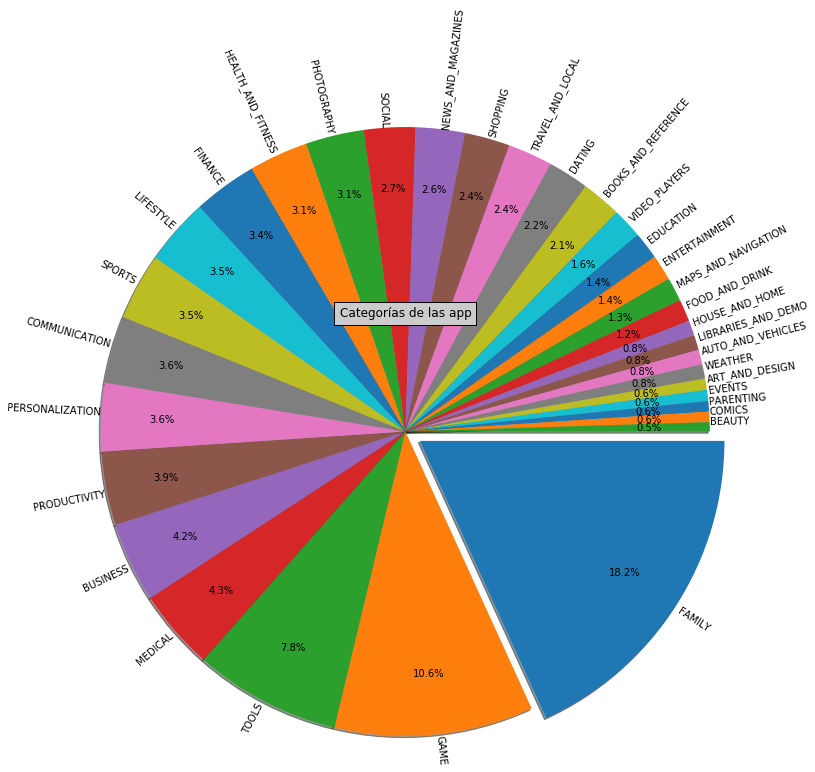

In [20]:
#Gráfica de tarta con los géneros de las aplicaciones.

dfCategory = df.groupby('Category').size().reset_index(name='Count').sort_values(by=['Count'], ascending = False)

dfCategory

#print(dfCategory)

categories = dfCategory['Category']
count = dfCategory['Count']
explode = np.zeros((len(categories)))
explode[0] = 0.2

plt.pie(count, labels=categories, shadow=True, startangle=0, radius=3.5, autopct='%1.1f%%', 
        pctdistance=0.8, labeldistance=1, rotatelabels=True, counterclock = False, explode=explode)

plt.title("Categorías de las app", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


<p>Como se puede apreciar, casi el 20% de las aplicaciones son de la categoría <i>FAMILY</i>, indicativo de que la gran mayoría del público busca aplicaciones sencillas y útiles para el día a día.</p>

<p>A continuación se muestra la relación entre las aplicaciones de tipo <i>FAMILY</i> con el rango de edad para verificar que las aplicaciones son para todos los públicos.</p>

  ContentRating  Count
0      Everyone   1529
3          Teen    261
1  Everyone 10+    131
2    Mature 17+     50
4       Unrated      1


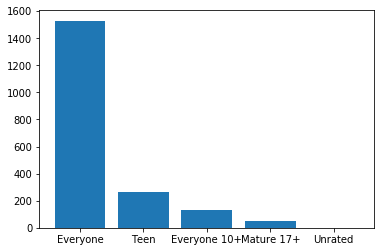

In [29]:
dfFamily = df.loc[df['Category'] == 'FAMILY']
dfContentRatingFamily = dfFamily.groupby('ContentRating').size().reset_index(name='Count').sort_values(by=['Count'], ascending = False)

print(dfContentRatingFamily)

plt.bar(dfContentRatingFamily['ContentRating'], height=dfContentRatingFamily['Count'])
plt.show()

<p>Con la anterior gráfica de barras se verifica lo que se esperaba.</p>

<p>Existe relación entre el tipo categoría y las votaciones?</p>